In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [41]:
# Load train & test
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train.shape

(60000, 785)

In [43]:
test.shape

(10000, 785)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29 130 130 225 255
  255 109   7 116 243 200   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   8  95 217 253 253 253 253
  253 253 253 253 253 248  11   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  27 213 253 2

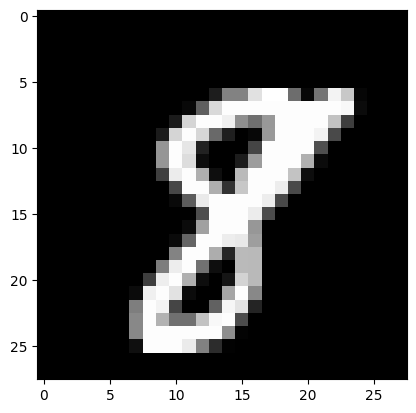

In [44]:
pixels = train.iloc[55, 1:].values.reshape(28, 28)  # reshape first row
print(pixels.shape)
print(pixels)
plt.imshow(pixels, cmap="gray")
plt.show()

#so basically data is the handwritten numbers pics in the pixels of numbers only......

In [45]:
X = train.drop(columns='label', axis=1)
y = train['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Use a smaller subset first (for faster training)
X_small = X_scaled[:5000]
y_small = y[:5000] #we did this because the data is way more huge and the compute power of our laptop is not that much even though its a map for this we need GPU's we dont have that. Thats why we get the chuck of the data
train_X, test_X, train_Y, test_Y = train_test_split(X_small, y_small,train_size=0.20, random_state=42)


In [46]:
model = SVC(max_iter=2000)
model.fit(train_X, train_Y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [47]:
y_pred = model.predict(test_X)
y_pred

array([0, 0, 7, ..., 0, 6, 8], shape=(4000,))

In [48]:
# 📊 Evaluate performance
print("\nConfusion Matrix:\n", confusion_matrix(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))


Confusion Matrix:
 [[361   0   9   1   2   1   1   0   2   0]
 [  0 435   6   0   0   2   0   0   3   0]
 [  3   6 362   1   5   0   2   6  11   0]
 [  1   7  40 315   2  10   1  10   9   0]
 [  1   4  16   0 394   2   2   7   1  17]
 [  0   3  16  16   3 290   8   4   2   6]
 [  8   3  22   0   3   4 358   0   0   0]
 [  2   8  19   0   5   0   0 379   0  14]
 [  4   6  16   5   1   8   4   4 308   9]
 [  4   2  15   4  14   1   0  23   1 340]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       377
           1       0.92      0.98      0.95       446
           2       0.69      0.91      0.79       396
           3       0.92      0.80      0.85       395
           4       0.92      0.89      0.90       444
           5       0.91      0.83      0.87       348
           6       0.95      0.90      0.93       398
           7       0.88      0.89      0.88       427
           8       0.91      0.84    

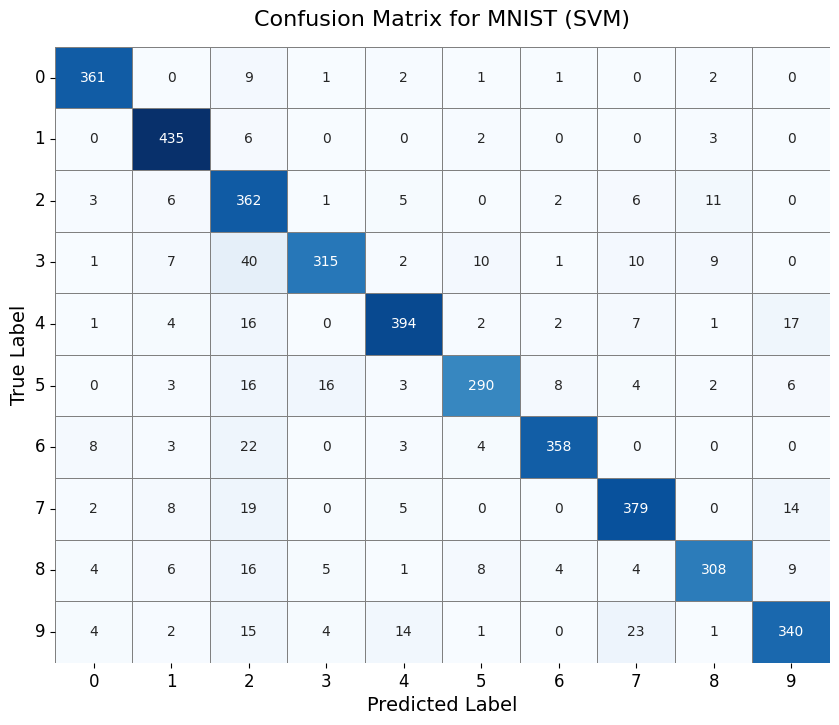

In [49]:
cm = confusion_matrix(test_Y, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=range(10), yticklabels=range(10),
            linewidths=0.5, linecolor='gray')

plt.title("Confusion Matrix for MNIST (SVM)", fontsize=16, pad=15)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.show()